In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [26]:
data=pd.read_csv('hypothyroid.csv')

In [27]:
data.head()

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


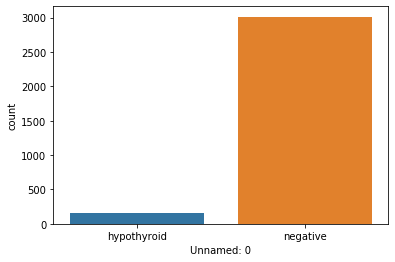

In [28]:
sns.countplot(data['Unnamed: 0'])

In [29]:
data_copy = data.copy(deep = True)
data_copy.replace(to_replace='?', inplace=True, value=0)
print(data_copy.isnull().sum())

Unnamed: 0                   0
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64


In [60]:
from sklearn.preprocessing import LabelEncoder 
#LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1
encoder = LabelEncoder()
columns=data_copy.columns
for cols in columns:
    #print(cols)
    if(isinstance(data_copy[cols].values[0],str)):
        try:
          data_copy[cols]=encoder.fit_transform(data_copy[cols].values)
        except:
          data_copy[cols]=np.array([float(v) for v in data_copy[cols].values])

ValueError: could not convert string to float: 'M'

In [48]:
data_copy.head()

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,0
1,0,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,0
2,0,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,0
3,0,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,0
4,0,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,0


In [49]:
x=data_copy.drop('Unnamed: 0',axis=1)

In [50]:
y=data_copy['Unnamed: 0']

In [56]:
sm=SMOTE()

In [57]:
X_sample,Y_sample=sm.fit_sample(x,y)

ValueError: could not convert string to float: 'M'

In [65]:
sns.countplot(Y_sample)


NameError: name 'Y_sample' is not defined

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X_sample,Y_sample,stratify=Y_sample,test_size=0.3,random_state=43)

NameError: name 'X_sample' is not defined

In [39]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

NameError: name 'x_train' is not defined

ValueError: x and y must have same first dimension, but have shapes (39,) and (0,)

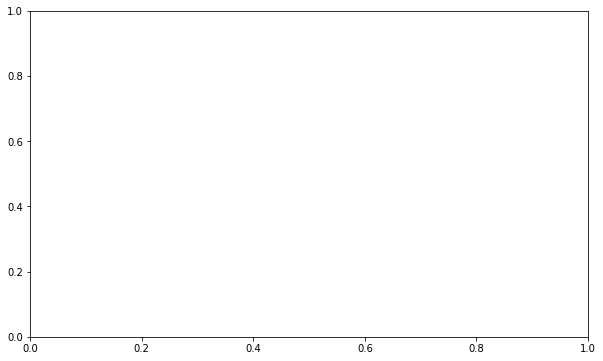

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xticks(range(1,40))
plt.ylabel("Error Rate")

In [41]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
acc_knn=knn.score(x_test,y_test)

NameError: name 'x_train' is not defined

In [42]:
acc_knn

NameError: name 'acc_knn' is not defined

In [43]:
error_rate=[]
for i in range(50,300,10):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

NameError: name 'x_train' is not defined

ValueError: x and y must have same first dimension, but have shapes (25,) and (0,)

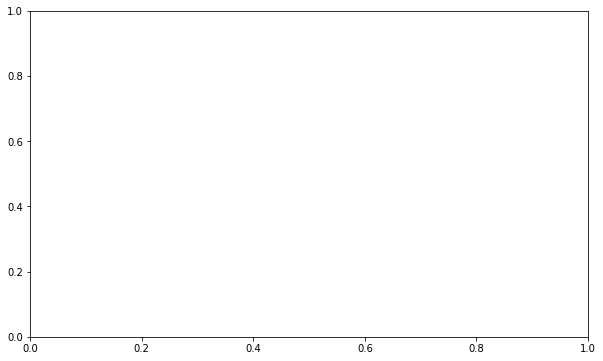

In [44]:
plt.figure(figsize=(10,6))
plt.plot(range(50,300,10),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="green", markersize=10)
plt.title("Error Rate vs. n_estimators")
plt.xlabel("n_estimator")
plt.xticks(range(50,300,10))
plt.ylabel("Error Rate")

In [22]:
rf=RandomForestClassifier(n_estimators=90)
rf.fit(x_train,y_train)
acc_rf=rf.score(x_test,y_test)

NameError: name 'RandomForestClassifier' is not defined

In [23]:
acc_rf

NameError: name 'acc_rf' is not defined